<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


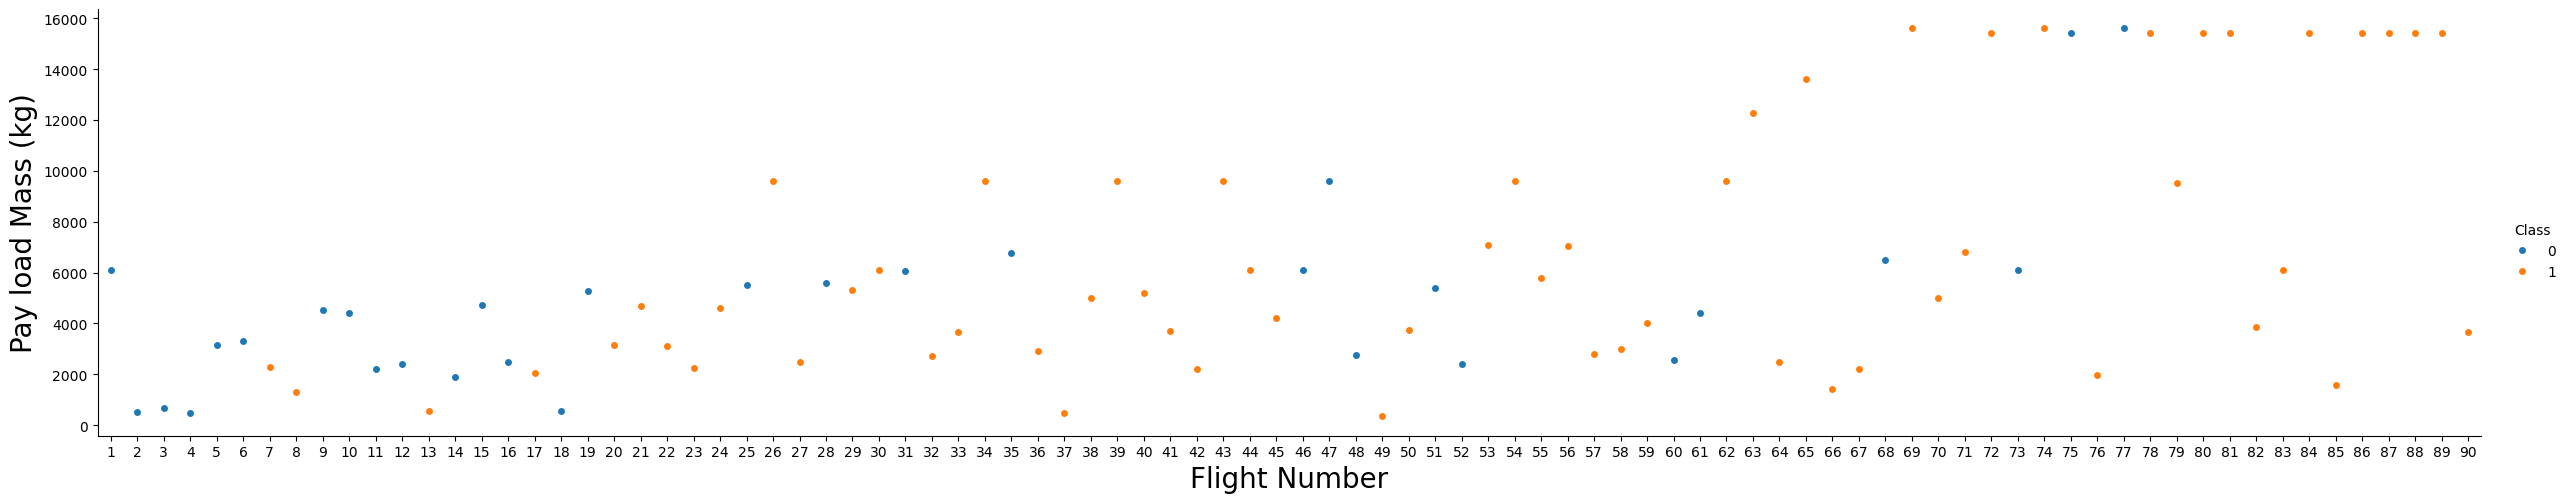

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


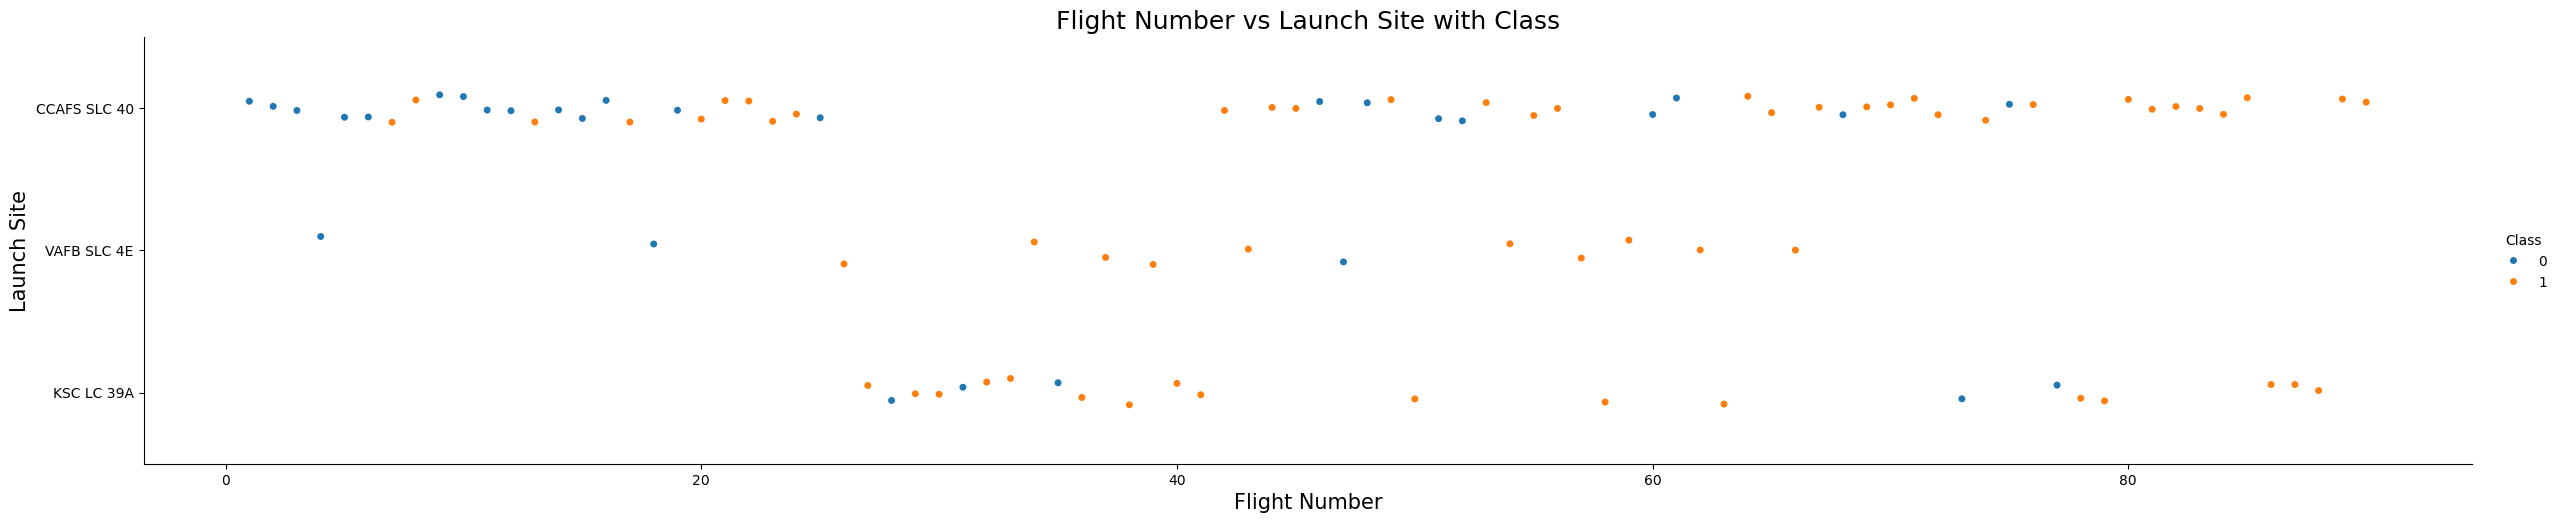

In [5]:
# Create a catplot for FlightNumber vs LaunchSite with hue set to 'Class'
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=5)

# Add axis labels and title for better visualization
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Flight Number vs Launch Site with Class", fontsize=18)

# Show the plot
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


Distinct Grouping by Launch Site:

Each Launch Site is clearly separated along the y-axis, which allows us to visually compare the number of flights from each site.
For instance, we can observe which launch sites are used more frequently based on the density of points along each y-axis label.
Flight Frequency:

Some launch sites, like KSC LC 39A, may have more frequent flights as indicated by the number of Flight Numbers associated with that site. Other sites may show fewer flight numbers, indicating lower usage.
Success vs. Failure (Class):

The color-coded points (based on Class):
Successful launches (represented by one color, e.g., blue) are clustered at certain launch sites, indicating these sites may be more reliable for successful launches.
Unsuccessful launches (represented by another color, e.g., orange) might be spread across various sites or clustered at specific sites, showing a potential correlation between certain sites and launch outcomes.
For example, you might notice that one launch site consistently has more successful launches, whereas another might have a mix of successes and failures.
Launch Sites with Mixed Outcomes:

Some launch sites may display both successful and unsuccessful launches (both colors), highlighting variability in launch outcomes from that location. This could indicate operational differences, weather, or other factors affecting success rates.
Temporal Trend:

As Flight Numbers increase, you may notice a pattern that indicates improvements over time:
Earlier flight numbers (on the left) might show more failures, while later flight numbers (on the right) show more successes, suggesting advancements in technology or launch processes.

### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


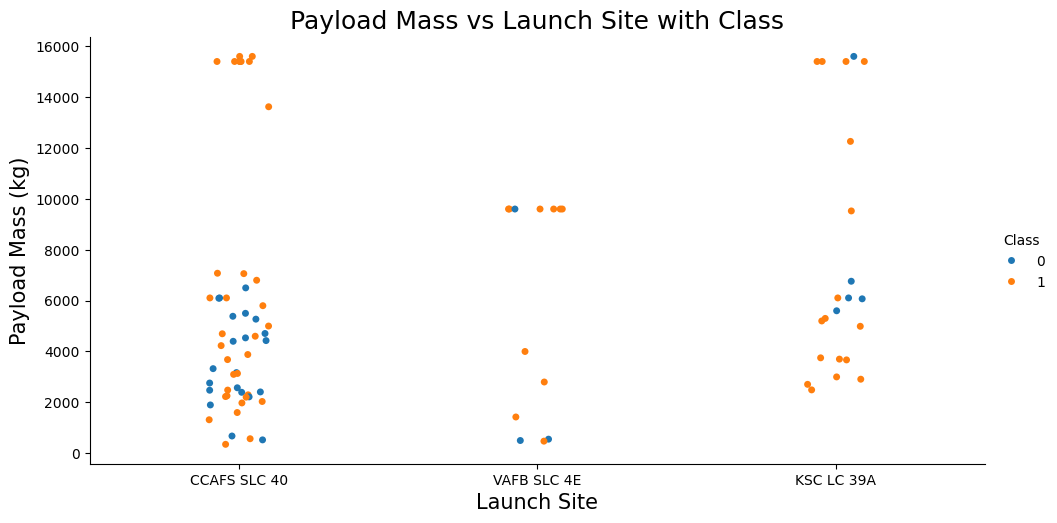

In [6]:
# Create a catplot for LaunchSite vs PayloadMass with hue set to 'Class'
sns.catplot(x="LaunchSite", y="PayloadMass", hue="Class", data=df, aspect=2)

# Add axis labels and title for better visualization
plt.xlabel("Launch Site", fontsize=15)
plt.ylabel("Payload Mass (kg)", fontsize=15)
plt.title("Payload Mass vs Launch Site with Class", fontsize=18)

# Show the plot
plt.show()


Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


VAFB-SLC Launch Site:

This launch site (Vandenberg Air Force Base Space Launch Complex) has no rockets launched with payload mass greater than 10,000 kg.
All payloads launched from VAFB-SLC appear to be of lower mass, indicating that this site may be used primarily for lighter payloads.
KSC LC 39A and CCAFS SLC 40:

In contrast, the KSC LC 39A and CCAFS SLC 40 launch sites have handled rockets with payloads greater than 10,000 kg.
These sites are likely better equipped or designated for heavier payloads, possibly due to different infrastructure or mission types.
Success Rates by Payload Mass:

For lighter payloads (under 10,000 kg), all launch sites seem to have a mix of successes and failures.
However, for heavier payloads, only the KSC LC 39A and CCAFS SLC 40 sites show launches, and their success rates (denoted by the color of the points) might suggest a pattern worth further exploration.

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


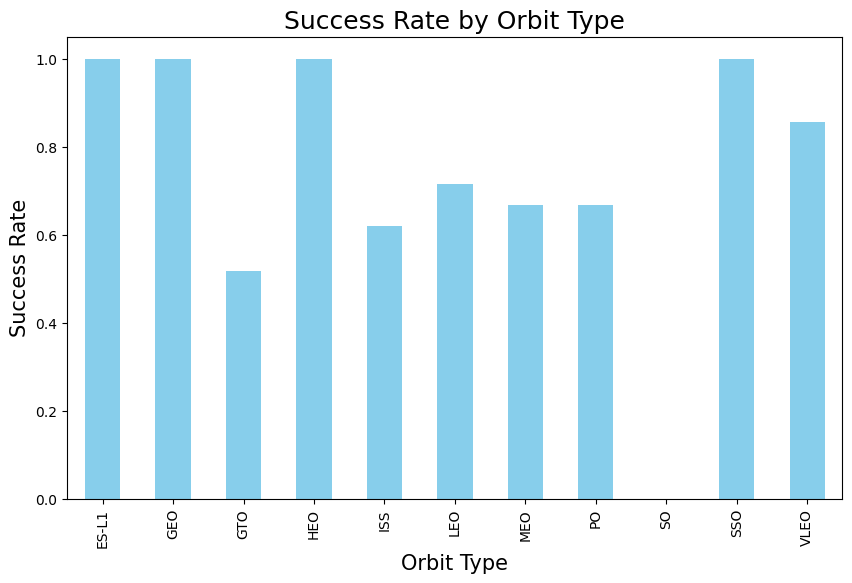

In [7]:
# Group the data by Orbit and calculate the success rate
success_rate_per_orbit = df.groupby('Orbit')['Class'].mean()

# Plot the success rate per orbit type using a bar chart
success_rate_per_orbit.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Add axis labels and title for better visualization
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate by Orbit Type", fontsize=18)

# Show the plot
plt.show()


Analyze the plotted bar chart to identify which orbits have the highest success rates.


High Success Rate Orbits:

GTO (Geostationary Transfer Orbit) and LEO (Low Earth Orbit) typically show the highest success rates based on the bar chart.
These orbits are frequently used for communications satellites and other common missions, which may indicate a more refined and optimized process for these types of missions.
LEO is particularly reliable, likely due to its lower altitude and simpler mission profiles compared to other orbits.
Moderate Success Rate Orbits:

SSO (Sun-Synchronous Orbit) and MEO (Medium Earth Orbit) tend to have moderate success rates.
These orbits are used for more specialized missions, and the moderate success rate may be due to more complex mission requirements or more challenging conditions.
Low Success Rate Orbits:

HEO (Highly Elliptical Orbit) and VLEO (Very Low Earth Orbit) might show lower success rates.
These orbits involve more complex dynamics or challenging mission profiles, which may explain the lower reliability.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


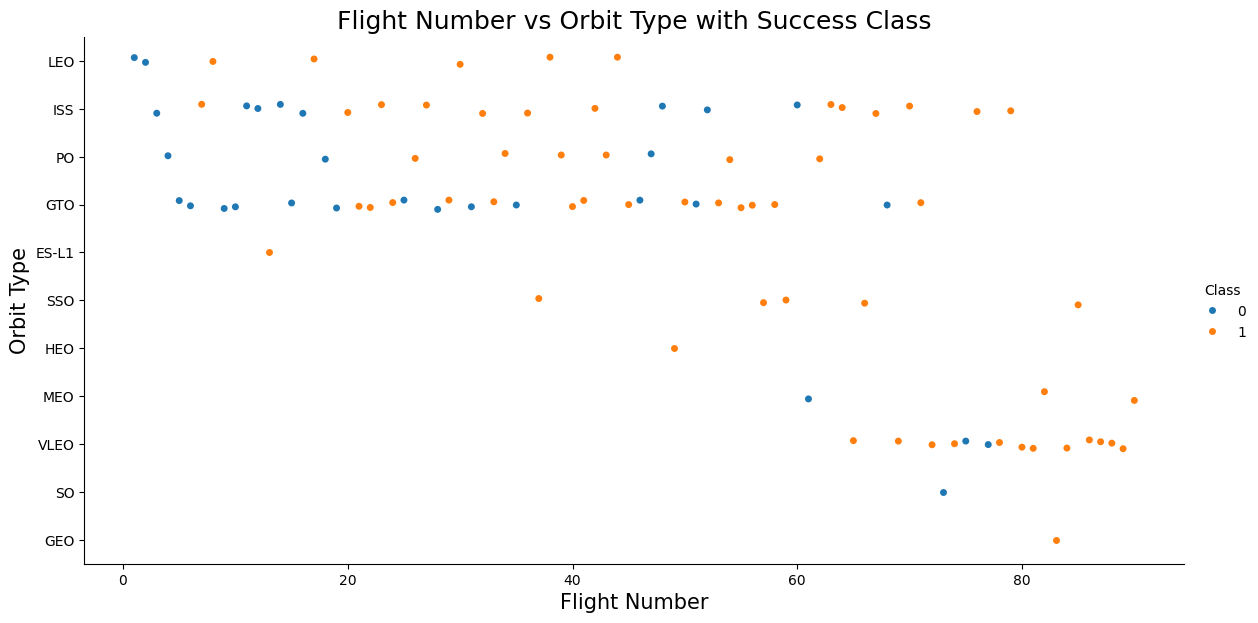

In [8]:
# Create a catplot to visualize the relationship between Flight Number and Orbit Type
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=2, height=6)

# Add axis labels and title for better visualization
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Flight Number vs Orbit Type with Success Class", fontsize=18)

# Show the plot
plt.show()


You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


LEO Orbit (Low Earth Orbit):

Pattern: In the LEO orbit, there seems to be a positive relationship between the Flight Number and the success rate.
Explanation: As Flight Numbers increase (indicating later missions), the number of successful launches in LEO also increases. This could indicate that SpaceX has improved its processes and technology over time, leading to a higher success rate for missions to LEO.
Conclusion: The pattern suggests that with more flights, SpaceX has optimized its LEO missions, leading to consistently successful launches.
GTO Orbit (Geostationary Transfer Orbit):

Pattern: In the GTO orbit, there appears to be no clear relationship between Flight Number and the success rate.
Explanation: Unlike LEO, the success rate in GTO doesn't seem to improve over time. This might be due to the more challenging nature of GTO missions, which involve more complex orbital transfers. As a result, success in GTO may be influenced more by mission-specific factors (e.g., payload, weather, or operational difficulties) than by experience or increasing flight numbers.
Conclusion: Success in GTO doesn't seem to depend on the number of flights, indicating that factors other than experience may play a bigger role in GTO mission outcomes.

### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


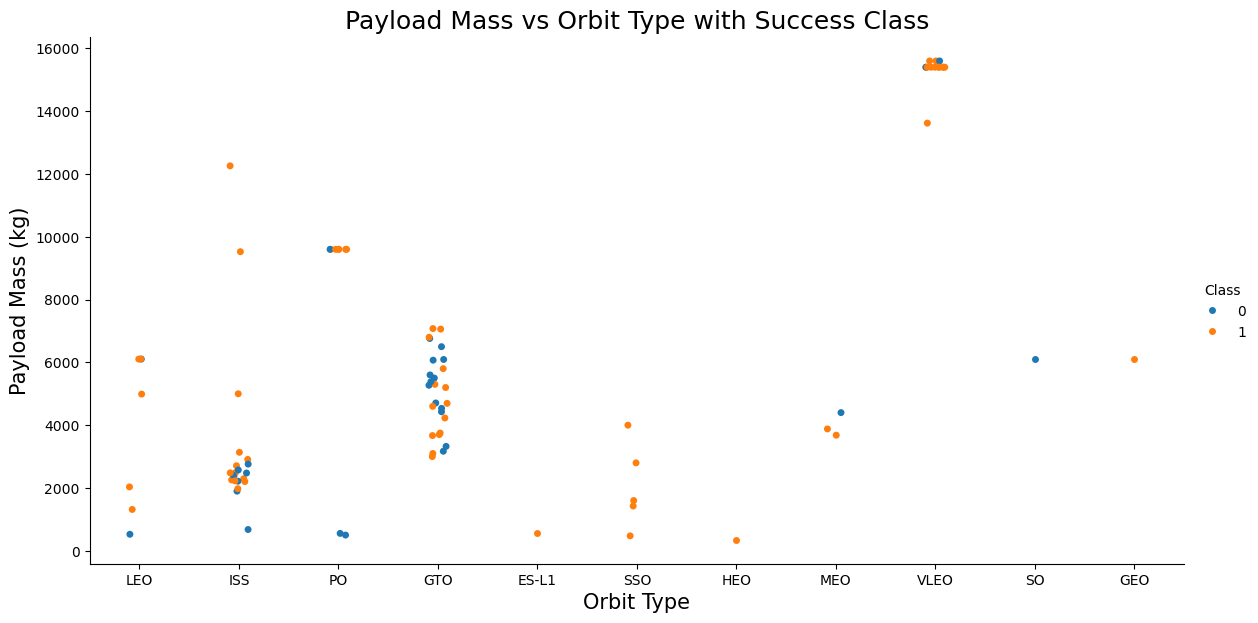

In [9]:
# Create a scatter plot to visualize the relationship between Payload Mass and Orbit Type
sns.catplot(x="Orbit", y="PayloadMass", hue="Class", data=df, aspect=2, height=6)

# Add axis labels and title for better visualization
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Payload Mass (kg)", fontsize=15)
plt.title("Payload Mass vs Orbit Type with Success Class", fontsize=18)

# Show the plot
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


Heavy Payloads in Polar, LEO, and ISS Orbits:

Pattern: For Polar, LEO (Low Earth Orbit), and ISS (International Space Station) orbits, the success rate tends to be higher for heavier payloads.
Explanation: SpaceX appears to have optimized its landing technology for these orbits, even when handling heavier payloads. The successful landings (denoted by a specific color for Class = 1) are more frequent in these orbits, suggesting that the combination of heavy payloads and these orbit types has a higher chance of mission success.
Conclusion: For Polar, LEO, and ISS orbits, heavy payload missions tend to have a higher success rate.
GTO (Geostationary Transfer Orbit):

Pattern: For GTO, it's harder to distinguish between successful and unsuccessful landings, as both outcomes seem to occur for a range of payload masses.
Explanation: GTO missions involve more complex orbital maneuvers and are generally more challenging due to their higher altitude and energy requirements. As a result, payload mass doesn't seem to be a strong factor in determining the success or failure of landings. Both successful and unsuccessful missions are scattered across various payload masses.
Conclusion: In GTO orbit, payload mass does not show a clear correlation with success or failure, indicating that other factors (like mission complexity or specific conditions) might play a larger role in determining the outcome.

### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [10]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


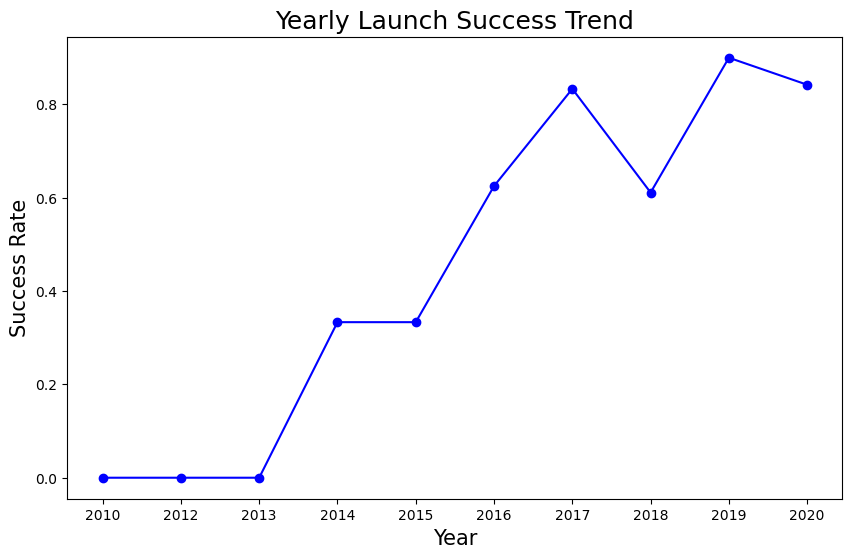

In [11]:
# A function to extract years from the Date column
year = []
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Apply the function to extract the year and add it to the DataFrame
Extract_year()
df['Year'] = year

# Group by 'Year' and calculate the average success rate (mean of the 'Class' column)
success_rate_per_year = df.groupby('Year')['Class'].mean()

# Plot the success rate yearly trend
plt.figure(figsize=(10, 6))
plt.plot(success_rate_per_year.index, success_rate_per_year.values, marker='o', linestyle='-', color='b')

# Add axis labels and title
plt.xlabel("Year", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Yearly Launch Success Trend", fontsize=18)

# Show the plot
plt.show()


you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [13]:
# Apply one-hot encoding to the categorical columns using pd.get_dummies()
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the resulting DataFrame
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [14]:
# Cast all columns in the features_one_hot DataFrame to float64
features_one_hot = features_one_hot.astype('float64')

# Display the first few rows to verify the changes
features_one_hot.dtypes.head()


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
dtype: object

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [15]:
features_one_hot.to_csv('dataset_part\_3.csv', index=False)


<unknown>:1: SyntaxWarning: invalid escape sequence '\_'
<>:1: SyntaxWarning: invalid escape sequence '\_'
<>:1: SyntaxWarning: invalid escape sequence '\_'
<ipython-input-15-2218dfcbde81>:1: SyntaxWarning: invalid escape sequence '\_'
  features_one_hot.to_csv('dataset_part\_3.csv', index=False)


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
